In [1]:
from ftplib import FTP
import pyodbc
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
###copying data file from FTP
#ftp = FTP('10.186.179.36')
#ftp.login('faraz','FaRaZ2017')
#ftp.cwd('DailyReports/Today')
#filename = '4G PRB Utilization2019_04_27.xlsx'
#ftp.retrbinary('RETR %s' % filename, open('4G PRB Utilization2019_04_27.xlsx', 'wb').write)

In [9]:
connection = pyodbc.connect("DRIVER={SQL Server};"
                  "SERVER=192.168.2.102;"
                  "DATABASE=shaygandb;"
                  "UID=shayganview;"
                  "PWD=View_123;"
                  "TrustServerCertificate=no;"
                  "Connection Timeout=60")

cursor=connection.cursor()

SQLCommand="""select Date, left([CELLID],2)+substring([CELLID],5,5) as [Sector] ,sum([Average_Number_of_RRC_Connected_Users]) as [Sum_RRC_Connected_Users] 
from KPI.Connected_User_4G
where cast(Date as date)>='2019-06-15' and cast(Date as date)<='2019-06-28'
group by Date, left([CELLID],2)+substring([CELLID],5,5)"""

cursor.execute(SQLCommand)
results=cursor.fetchall()

In [11]:
d=[]
for row in results:
    d.append({'Date':row.Date, 'Sector':row.Sector, 'Sum_RRC_Connected_Users':row.Sum_RRC_Connected_Users})
SumUser=pd.DataFrame(d)
SumUser

,Date,Sector,Sum_RRC_Connected_Users
0,2019-07-01 13:00:00,AS0237A,76.132
1,2019-07-01 05:00:00,KJ0670C,15.551
2,2019-07-01 21:00:00,QM0046B,88.836
3,2019-07-06 08:00:00,FS0343C,18.453
4,2019-07-06 21:00:00,YZ0052B,69.095
5,2019-07-06 19:00:00,YZ0421B,23.037
6,2019-07-01 07:00:00,KD0326A,23.682
7,2019-07-06 12:00:00,YZ0353B,15.451
8,2019-07-01 07:00:00,TH1200B,34.137
9,2019-07-01 20:00:00,LN0524C,28.044


In [2]:
Ericsson=pd.read_csv('Ericsson.csv')

In [19]:
Ericsson

,Date,ElementID,ElementID1,Average_RRC_Connected_Users(EUCell_Eric),Total_Volume(UL+DL)(GB)(EUCell_Eric),Total_DL_Volume(GB)(EUCell_Eric),Average_UE_DL_Throughput(Mbps)(EUCell_Eric),DL_PRB_Utilization_Rate(EUCell_Eric),Average_PDCP_Cell_Dl_Throughput(Mbps)(EUCell_Eric),RRC_Connection_Setup_Success_Rate(EUCell_Eric),LTE_Service_Setup_SR(EUCell_Eric),Sector
0,2019-04-20 08:00:00,KJ,KJ2L0115C1,16.915,1.388,1.072,18.256,12.902,9.082,100.000,100.000,KJ0115C
1,2019-04-26 12:00:00,MA,MA2L0079A1,29.411,1.484,1.328,1.782,31.099,3.674,99.802,99.580,MA0079A
2,2019-04-24 14:00:00,MA,MA2L0695C1,38.538,2.998,2.685,12.763,36.698,11.964,99.972,99.789,MA0695C
3,2019-04-22 22:00:00,MA,MA2L0550C1,9.542,0.529,0.466,30.158,3.877,7.888,100.000,100.000,MA0550C
4,2019-04-26 14:00:00,TH,TH1L0650B1,88.819,6.913,5.969,10.773,52.238,18.405,99.992,99.935,TH0650B
5,2019-04-24 17:00:00,TH,TH2L2193C1,135.438,11.106,10.152,9.340,69.594,25.422,99.987,99.933,TH2193C
6,2019-04-22 04:00:00,TH,TH1L0883C1,24.301,0.888,0.818,44.573,5.166,12.645,99.974,99.974,TH0883C
7,2019-04-21 01:00:00,TH,TH1L1679A1,123.081,21.688,20.207,13.758,84.980,46.554,99.991,99.973,TH1679A
8,2019-04-24 17:00:00,TH,TH2L1082B1,51.806,4.096,3.571,12.375,37.806,15.320,99.930,99.642,TH1082B
9,2019-04-26 13:00:00,MA,MA2L0612C1,18.922,2.097,1.921,13.176,26.788,9.242,99.942,99.821,MA0612C


In [4]:
Ericsson.nunique()

Date                                                     168
ElementID                                                  5
ElementID1                                             16771
Average_RRC_Connected_Users(EUCell_Eric)              127849
Total_Volume(UL+DL)(GB)(EUCell_Eric)                   22328
Total_DL_Volume(GB)(EUCell_Eric)                       21439
Average_UE_DL_Throughput(Mbps)(EUCell_Eric)            70998
DL_PRB_Utilization_Rate(EUCell_Eric)                   98350
Average_PDCP_Cell_Dl_Throughput(Mbps)(EUCell_Eric)     53742
RRC_Connection_Setup_Success_Rate(EUCell_Eric)          2929
LTE_Service_Setup_SR(EUCell_Eric)                       7561
dtype: int64

In [5]:
Ericsson.isna().any()

Date                                                  False
ElementID                                             False
ElementID1                                            False
Average_RRC_Connected_Users(EUCell_Eric)               True
Total_Volume(UL+DL)(GB)(EUCell_Eric)                   True
Total_DL_Volume(GB)(EUCell_Eric)                       True
Average_UE_DL_Throughput(Mbps)(EUCell_Eric)            True
DL_PRB_Utilization_Rate(EUCell_Eric)                   True
Average_PDCP_Cell_Dl_Throughput(Mbps)(EUCell_Eric)     True
RRC_Connection_Setup_Success_Rate(EUCell_Eric)         True
LTE_Service_Setup_SR(EUCell_Eric)                      True
dtype: bool

In [6]:
Ericsson['Sector']=Ericsson['ElementID1'].str[:2]+Ericsson['ElementID1'].str[4:9]

In [7]:
Eric_Sec=Ericsson.groupby(by=['Date','Sector'],as_index=False)['Average_RRC_Connected_Users(EUCell_Eric)'].sum()

In [8]:
Eric_Sec[Eric_Sec['Sector']=='GL0001A'].max()

Date                                        2019-04-26 23:00:00
Sector                                                  GL0001A
Average_RRC_Connected_Users(EUCell_Eric)                 99.989
dtype: object

In [9]:
df2=Eric_Sec[Eric_Sec['Sector']=='GL0001A']

In [10]:
df2[df2['Average_RRC_Connected_Users(EUCell_Eric)']==df2['Average_RRC_Connected_Users(EUCell_Eric)'].max()]

,Date,Sector,Average_RRC_Connected_Users(EUCell_Eric)
1373380,2019-04-25 12:00:00,GL0001A,99.989


In [11]:
Eric_max=Eric_Sec.groupby(by='Sector',as_index=False)['Average_RRC_Connected_Users(EUCell_Eric)'].max()

In [16]:
Eric_maxUser=pd.merge(Eric_max,Eric_Sec,on=['Sector','Average_RRC_Connected_Users(EUCell_Eric)'],how='left')

In [17]:
Eric_maxUser.drop_duplicates('Sector',inplace=True)

In [18]:
Eric_maxUser

,Sector,Average_RRC_Connected_Users(EUCell_Eric),Date
0,GL0001A,99.989,2019-04-25 12:00:00
1,GL0001B,120.739,2019-04-25 12:00:00
2,GL0001C,93.308,2019-04-24 20:00:00
3,GL0002A,122.246,2019-04-23 12:00:00
4,GL0002B,117.939,2019-04-20 11:00:00
5,GL0002C,168.515,2019-04-23 11:00:00
6,GL0003A,146.499,2019-04-22 23:00:00
7,GL0003B,41.234,2019-04-20 12:00:00
8,GL0003C,86.949,2019-04-25 20:00:00
9,GL0004A,199.544,2019-04-26 23:00:00


In [20]:
Eric_final=pd.merge(Eric_maxUser,Ericsson,on=['Sector','Date'],how='inner')

In [21]:
Eric_final

,Sector,Average_RRC_Connected_Users(EUCell_Eric)_x,Date,ElementID,ElementID1,Average_RRC_Connected_Users(EUCell_Eric)_y,Total_Volume(UL+DL)(GB)(EUCell_Eric),Total_DL_Volume(GB)(EUCell_Eric),Average_UE_DL_Throughput(Mbps)(EUCell_Eric),DL_PRB_Utilization_Rate(EUCell_Eric),Average_PDCP_Cell_Dl_Throughput(Mbps)(EUCell_Eric),RRC_Connection_Setup_Success_Rate(EUCell_Eric),LTE_Service_Setup_SR(EUCell_Eric)
0,GL0001A,99.989,2019-04-25 12:00:00,GL,GL2L0001A1,99.989,5.152,4.378,2.144,71.792,10.487,99.956,99.899
1,GL0001B,120.739,2019-04-25 12:00:00,GL,GL2L0001B1,120.739,4.663,3.939,1.918,72.112,9.341,99.975,99.888
2,GL0001C,93.308,2019-04-24 20:00:00,GL,GL2L0001C1,93.308,4.186,3.459,2.413,66.463,8.234,100.000,99.865
3,GL0002A,122.246,2019-04-23 12:00:00,GL,GL2L0002A1,34.447,2.069,1.816,6.704,37.806,7.755,99.946,99.856
4,GL0002A,122.246,2019-04-23 12:00:00,GL,GL1L0002A1,87.799,10.155,9.282,14.829,59.410,25.807,99.990,99.990
5,GL0002B,117.939,2019-04-20 11:00:00,GL,GL2L0002B1,43.265,2.466,2.147,5.516,50.516,8.166,99.935,99.759
6,GL0002B,117.939,2019-04-20 11:00:00,GL,GL1L0002B1,74.674,4.632,4.183,7.074,62.770,12.509,99.951,99.913
7,GL0002C,168.515,2019-04-23 11:00:00,GL,GL2L0002C1,73.850,3.930,3.478,4.734,64.222,9.989,99.987,99.836
8,GL0002C,168.515,2019-04-23 11:00:00,GL,GL1L0002C1,94.665,5.330,4.781,6.751,65.289,13.885,100.000,99.935
9,GL0003A,146.499,2019-04-22 23:00:00,GL,GL2L0003A1,53.267,4.267,3.567,1.573,82.650,8.132,99.821,99.688


In [22]:
Eric_final['FreqBand']=np.nan

In [23]:
Eric_final.loc[Eric_final['ElementID1'].str[2:4]=='1L','FreqBand']='2600'
Eric_final.loc[Eric_final['ElementID1'].str[2:4]=='2L','FreqBand']='1800'
Eric_final.loc[Eric_final['ElementID1'].str[2:4]=='7L','FreqBand']='2600'
Eric_final.loc[Eric_final['ElementID1'].str[2:4]=='8L','FreqBand']='1800'
Eric_final.loc[Eric_final['ElementID1'].str[2:4]=='4L','FreqBand']='2600'
Eric_final.loc[Eric_final['ElementID1'].str[2:4]=='5L','FreqBand']='1800'

In [24]:
gg=pd.DataFrame(Eric_final['Sector'].value_counts())
gg.reset_index(inplace=True)
gg.columns = ['Sector','Count']

In [27]:
Eric_final2= Eric_final.merge(gg,on = 'Sector')

In [28]:
Eric_final3=pd.DataFrame(Eric_final2[Eric_final2['Count']==2])

In [29]:
Eric_PRB_Utilization_1800=Eric_final3[Eric_final3['FreqBand']=='1800']

In [30]:
Eric_PRB_Utilization_2600=Eric_final3[Eric_final3['FreqBand']=='2600']
Eric_PRB_Utilization_2600.drop(columns='Count',inplace=True)
Eric_PRB_Utilization_1800.drop(columns='Count',inplace=True)

C:\Users\Milad\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [31]:
Eric_PRB_Utilization_Colocate=pd.merge(Eric_PRB_Utilization_1800,Eric_PRB_Utilization_2600,how='left',on='Sector')

In [32]:
Eric_PRB_Utilization_Colocate

,Sector,Average_RRC_Connected_Users(EUCell_Eric)_x_x,Date_x,ElementID_x,ElementID1_x,Average_RRC_Connected_Users(EUCell_Eric)_y_x,Total_Volume(UL+DL)(GB)(EUCell_Eric)_x,Total_DL_Volume(GB)(EUCell_Eric)_x,Average_UE_DL_Throughput(Mbps)(EUCell_Eric)_x,DL_PRB_Utilization_Rate(EUCell_Eric)_x,...,ElementID1_y,Average_RRC_Connected_Users(EUCell_Eric)_y_y,Total_Volume(UL+DL)(GB)(EUCell_Eric)_y,Total_DL_Volume(GB)(EUCell_Eric)_y,Average_UE_DL_Throughput(Mbps)(EUCell_Eric)_y,DL_PRB_Utilization_Rate(EUCell_Eric)_y,Average_PDCP_Cell_Dl_Throughput(Mbps)(EUCell_Eric)_y,RRC_Connection_Setup_Success_Rate(EUCell_Eric)_y,LTE_Service_Setup_SR(EUCell_Eric)_y,FreqBand_y
0,GL0002A,122.246,2019-04-23 12:00:00,GL,GL2L0002A1,34.447,2.069,1.816,6.704,37.806,...,GL1L0002A1,87.799,10.155,9.282,14.829,59.410,25.807,99.990,99.990,2600
1,GL0002B,117.939,2019-04-20 11:00:00,GL,GL2L0002B1,43.265,2.466,2.147,5.516,50.516,...,GL1L0002B1,74.674,4.632,4.183,7.074,62.770,12.509,99.951,99.913,2600
2,GL0002C,168.515,2019-04-23 11:00:00,GL,GL2L0002C1,73.850,3.930,3.478,4.734,64.222,...,GL1L0002C1,94.665,5.330,4.781,6.751,65.289,13.885,100.000,99.935,2600
3,GL0003A,146.499,2019-04-22 23:00:00,GL,GL2L0003A1,53.267,4.267,3.567,1.573,82.650,...,GL1L0003A1,93.232,7.286,6.377,7.267,63.166,16.818,99.988,99.975,2600
4,GL0003B,41.234,2019-04-20 12:00:00,GL,GL2L0003B1,25.453,0.998,0.846,6.783,22.668,...,GL1L0003B1,15.781,1.173,1.062,16.180,14.520,11.872,99.949,99.949,2600
5,GL0003C,86.949,2019-04-25 20:00:00,GL,GL2L0003C1,34.200,1.838,1.573,4.267,45.906,...,GL1L0003C1,52.749,2.919,2.558,15.212,28.272,12.898,100.000,99.815,2600
6,GL0004A,199.544,2019-04-26 23:00:00,GL,GL2L0004A1,79.925,4.161,3.518,0.894,72.119,...,GL1L0004A1,119.619,9.583,8.377,5.484,74.428,20.220,99.989,99.942,2600
7,GL0004B,153.122,2019-04-23 14:00:00,GL,GL2L0004B1,61.953,3.812,3.276,2.307,67.513,...,GL1L0004B1,91.169,6.909,5.466,4.415,74.446,13.588,99.955,99.932,2600
8,GL0004C,272.302,2019-04-22 23:00:00,GL,GL2L0004C1,116.419,3.413,2.699,0.150,57.029,...,GL1L0004C1,155.883,11.278,9.811,1.496,96.072,21.847,100.000,99.941,2600
9,GL0005A,202.800,2019-04-24 17:00:00,GL,GL2L0005A1,62.550,4.534,3.859,2.567,79.915,...,GL1L0005A1,140.250,10.753,9.889,6.323,82.926,23.672,99.977,99.952,2600


In [37]:
Eric_PRB_Utilization_Colocate['Result']=np.nan

In [38]:
Eric_PRB_Utilization_Colocate.loc[(Eric_PRB_Utilization_Colocate['DL_PRB_Utilization_Rate(EUCell_Eric)_x']>50)&(Eric_PRB_Utilization_Colocate['DL_PRB_Utilization_Rate(EUCell_Eric)_x']<=80)&(Eric_PRB_Utilization_Colocate['DL_PRB_Utilization_Rate(EUCell_Eric)_x']>2*Eric_PRB_Utilization_Colocate['DL_PRB_Utilization_Rate(EUCell_Eric)_y']),'Result']='OverLoad 1800'
Eric_PRB_Utilization_Colocate.loc[(Eric_PRB_Utilization_Colocate['DL_PRB_Utilization_Rate(EUCell_Eric)_y']>50)&(Eric_PRB_Utilization_Colocate['DL_PRB_Utilization_Rate(EUCell_Eric)_y']<=80)&(Eric_PRB_Utilization_Colocate['DL_PRB_Utilization_Rate(EUCell_Eric)_y']>2*Eric_PRB_Utilization_Colocate['DL_PRB_Utilization_Rate(EUCell_Eric)_x']),'Result']='OverLoad 2600'
Eric_PRB_Utilization_Colocate.loc[(Eric_PRB_Utilization_Colocate['DL_PRB_Utilization_Rate(EUCell_Eric)_x']>80)&(Eric_PRB_Utilization_Colocate['DL_PRB_Utilization_Rate(EUCell_Eric)_x']>1.5*Eric_PRB_Utilization_Colocate['DL_PRB_Utilization_Rate(EUCell_Eric)_y']),'Result']='OverLoad 1800'
Eric_PRB_Utilization_Colocate.loc[(Eric_PRB_Utilization_Colocate['DL_PRB_Utilization_Rate(EUCell_Eric)_y']>80)&(Eric_PRB_Utilization_Colocate['DL_PRB_Utilization_Rate(EUCell_Eric)_y']>1.5*Eric_PRB_Utilization_Colocate['DL_PRB_Utilization_Rate(EUCell_Eric)_x']),'Result']='OverLoad 2600'

In [55]:
Eric_PRB_Utilization_Colocate.loc[Eric_PRB_Utilization_Colocate['Result'].isnull(),'Result']='Normal'

In [57]:
Eric_PRB_Utilization_Colocate['Result'].value_counts()

Normal           5748
OverLoad 1800     499
OverLoad 2600      36
Name: Result, dtype: int64

In [62]:
Eric_PRB_Utilization_Colocate

,Sector,Average_RRC_Connected_Users(EUCell_Eric)_x_x,Date_x,ElementID_x,ElementID1_x,Average_RRC_Connected_Users(EUCell_Eric)_y_x,Total_Volume(UL+DL)(GB)(EUCell_Eric)_x,Total_DL_Volume(GB)(EUCell_Eric)_x,Average_UE_DL_Throughput(Mbps)(EUCell_Eric)_x,DL_PRB_Utilization_Rate(EUCell_Eric)_x,...,Average_RRC_Connected_Users(EUCell_Eric)_y_y,Total_Volume(UL+DL)(GB)(EUCell_Eric)_y,Total_DL_Volume(GB)(EUCell_Eric)_y,Average_UE_DL_Throughput(Mbps)(EUCell_Eric)_y,DL_PRB_Utilization_Rate(EUCell_Eric)_y,Average_PDCP_Cell_Dl_Throughput(Mbps)(EUCell_Eric)_y,RRC_Connection_Setup_Success_Rate(EUCell_Eric)_y,LTE_Service_Setup_SR(EUCell_Eric)_y,FreqBand_y,Result
0,GL0002A,122.246,2019-04-23 12:00:00,GL,GL2L0002A1,34.447,2.069,1.816,6.704,37.806,...,87.799,10.155,9.282,14.829,59.410,25.807,99.990,99.990,2600,Normal
1,GL0002B,117.939,2019-04-20 11:00:00,GL,GL2L0002B1,43.265,2.466,2.147,5.516,50.516,...,74.674,4.632,4.183,7.074,62.770,12.509,99.951,99.913,2600,Normal
2,GL0002C,168.515,2019-04-23 11:00:00,GL,GL2L0002C1,73.850,3.930,3.478,4.734,64.222,...,94.665,5.330,4.781,6.751,65.289,13.885,100.000,99.935,2600,Normal
3,GL0003A,146.499,2019-04-22 23:00:00,GL,GL2L0003A1,53.267,4.267,3.567,1.573,82.650,...,93.232,7.286,6.377,7.267,63.166,16.818,99.988,99.975,2600,Normal
4,GL0003B,41.234,2019-04-20 12:00:00,GL,GL2L0003B1,25.453,0.998,0.846,6.783,22.668,...,15.781,1.173,1.062,16.180,14.520,11.872,99.949,99.949,2600,Normal
5,GL0003C,86.949,2019-04-25 20:00:00,GL,GL2L0003C1,34.200,1.838,1.573,4.267,45.906,...,52.749,2.919,2.558,15.212,28.272,12.898,100.000,99.815,2600,Normal
6,GL0004A,199.544,2019-04-26 23:00:00,GL,GL2L0004A1,79.925,4.161,3.518,0.894,72.119,...,119.619,9.583,8.377,5.484,74.428,20.220,99.989,99.942,2600,Normal
7,GL0004B,153.122,2019-04-23 14:00:00,GL,GL2L0004B1,61.953,3.812,3.276,2.307,67.513,...,91.169,6.909,5.466,4.415,74.446,13.588,99.955,99.932,2600,Normal
8,GL0004C,272.302,2019-04-22 23:00:00,GL,GL2L0004C1,116.419,3.413,2.699,0.150,57.029,...,155.883,11.278,9.811,1.496,96.072,21.847,100.000,99.941,2600,OverLoad 2600
9,GL0005A,202.800,2019-04-24 17:00:00,GL,GL2L0005A1,62.550,4.534,3.859,2.567,79.915,...,140.250,10.753,9.889,6.323,82.926,23.672,99.977,99.952,2600,Normal


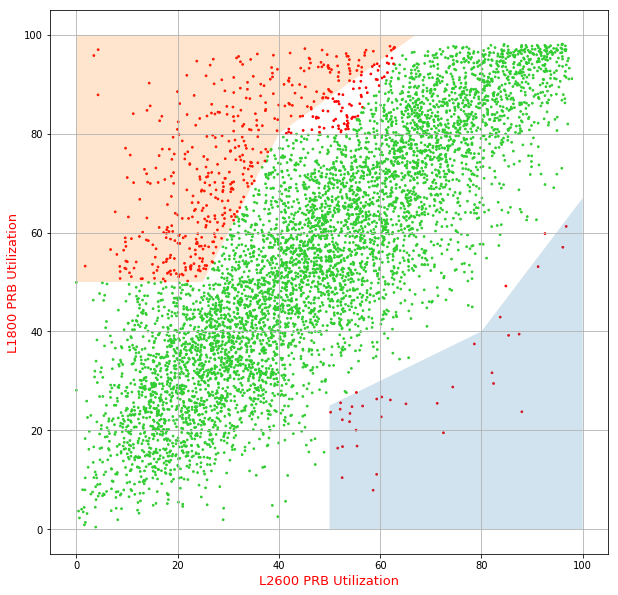

In [61]:
x = [50, 50, 80, 100, 100]
y = [0, 25, 40, 67, 0]

fig, ax = plt.subplots()
ax.fill(x, y,alpha=0.2)
colors={'Normal':'limegreen', 'OverLoad 1800' :'red', 'OverLoad 2600':'red'}
y = [50, 50, 80, 100, 100]
x = [0, 25, 40, 67, 0]
fig.set_size_inches(10, 10)
ax.fill(x, y,alpha=0.2)
ax.set_xlabel('L2600 PRB Utilization',fontsize=13,color='red')
ax.set_ylabel('L1800 PRB Utilization',fontsize=13,color='red')
ax.grid()
ax.scatter(x=Eric_PRB_Utilization_Colocate['DL_PRB_Utilization_Rate(EUCell_Eric)_y'],y=Eric_PRB_Utilization_Colocate['DL_PRB_Utilization_Rate(EUCell_Eric)_x'],s=3,c=Eric_PRB_Utilization_Colocate['Result'].apply(lambda x: colors[x]))
#ax.plot([0, 100],[0, 50])
plt.show()

In [ ]:

x = [0, 50, 80, 100, 100]
y = [0, 25, 40, 67, 0]

fig, ax = plt.subplots()
ax.fill(x, y,alpha=0.2)
colors={'Normal':'limegreen', 'OverLoad 1800' :'red', 'OverLoad 2600':'red'}
y = [50, 50, 80, 100, 100]
x = [0, 25, 40, 67, 0]
fig.set_size_inches(10, 10)
ax.fill(x, y,alpha=0.2)
ax.set_xlabel('L2600 PRB Utilization',fontsize=13,color='red')
ax.set_ylabel('L1800 PRB Utilization',fontsize=13,color='red')
ax.grid()
ax.scatter(x=Eric_PRB_Utilization_Colocate['DL_PRB_Utilization_Rate(EUCell_Eric)_y'],y=Eric_PRB_Utilization_Colocate['DL_PRB_Utilization_Rate(EUCell_Eric)_x'],s=3,c=Eric_PRB_Utilization_Colocate['Result'].apply(lambda x: colors[x]))
#ax.plot([0, 100],[0, 50])
plt.show()